# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [106]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Import Statements

In [107]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [108]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [109]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('fatal-police-shootings-data.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [110]:
data_frames = [
    ("Median_Household_Income_2015", df_hh_income),
    ("Pct_People_Below_Poverty_Level", df_pct_poverty),
    ("Pct_Over_25_Completed_High_School", df_pct_completed_hs),
    ("Share_of_Race_By_City", df_share_race_city),
    ("fatal-police-shootings-data", df_fatalities),
]

for df in data_frames:
    filename, data = df
    print(f"File: {filename}")
    print(f"Shape: {data.shape}")
    print(f"Column names: {data.columns}")
    print(f"Number of NaN values: {data.isna().values.sum()}")
    print(f"Number of Duplicate values: {data.duplicated().values.sum()}\n")

File: Median_Household_Income_2015
Shape: (29322, 3)
Column names: Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Number of NaN values: 51
Number of Duplicate values: 0

File: Pct_People_Below_Poverty_Level
Shape: (29329, 3)
Column names: Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Number of NaN values: 0
Number of Duplicate values: 0

File: Pct_Over_25_Completed_High_School
Shape: (29329, 3)
Column names: Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Number of NaN values: 0
Number of Duplicate values: 0

File: Share_of_Race_By_City
Shape: (29268, 7)
Column names: Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Number of NaN values: 0
Number of Duplicate values: 0

File: fatal-police-shootings-data
Shape: (8002, 17)
Column names: Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'r

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [111]:
print(f"Columns with NaN values in the House Hold Income dataset:\n{df_hh_income.isna().sum()}")

Columns with NaN values in the House Hold Income dataset:
Geographic Area     0
City                0
Median Income      51
dtype: int64


In [112]:
print(f"Column with NaN values in the police deaths dataset:\n{df_fatalities.isna().sum()}")

Column with NaN values in the police deaths dataset:
id                            0
name                        454
date                          0
manner_of_death               0
armed                       211
age                         503
gender                       31
race                       1517
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        966
body_camera                   0
longitude                   840
latitude                    840
is_geocoding_exact            0
dtype: int64


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [113]:
# poverty_rate column holds string values
df_pct_poverty.dtypes

Geographic Area    object
City               object
poverty_rate       object
dtype: object

In [114]:
# for some rows the poverty_rate contains only a hyphen ("-")
df_pct_poverty[df_pct_poverty.poverty_rate == "-"]["poverty_rate"].count()

np.int64(201)

In [115]:
# convert poverty_rate to numeric value
df_pct_poverty["poverty_rate"] = pd.to_numeric(df_pct_poverty.poverty_rate, errors="coerce")

In [116]:
poverty_rate_by_state = df_pct_poverty.groupby("Geographic Area")["poverty_rate"].median().sort_values(ascending=False).reset_index()
poverty_rate_by_state

,Geographic Area,poverty_rate
0,MS,26.45
1,GA,23.50
2,AR,22.30
3,SC,22.20
4,LA,21.00
5,AZ,20.35
6,NM,19.70
7,KY,19.50
8,TN,19.45
9,WV,19.15


In [117]:
bar_poverty_rate_by_state = px.bar(
    data_frame=poverty_rate_by_state,
    x=poverty_rate_by_state["Geographic Area"],
    y=poverty_rate_by_state.poverty_rate,
    color=poverty_rate_by_state["Geographic Area"]
)

bar_poverty_rate_by_state.update_layout(
    title="Poverty Rate by U.S. States",
    xaxis_title="U.S. State",
    yaxis_title="Poverty Rate (Mean)",
)

bar_poverty_rate_by_state.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [118]:
# the percent_completed_hs column contains hyphens "-"
df_pct_completed_hs[df_pct_completed_hs.percent_completed_hs == "-"]["percent_completed_hs"].count()

np.int64(197)

In [119]:
# convert highschool completion rates to numeric
df_pct_completed_hs["percent_completed_hs"] = pd.to_numeric(df_pct_completed_hs.percent_completed_hs, errors="coerce")

In [120]:
high_school_completion_rate_by_state = df_pct_completed_hs.groupby("Geographic Area")["percent_completed_hs"].mean().sort_values(ascending=True).reset_index()
high_school_completion_rate_by_state

,Geographic Area,percent_completed_hs
0,TX,75.69
1,MS,78.47
2,GA,79.01
3,LA,79.29
4,AR,79.95
5,AL,80.30
6,AZ,80.47
7,SC,80.85
8,NM,80.98
9,TN,81.63


In [121]:
bar_highschool_completion_rate = px.bar(
    data_frame=high_school_completion_rate_by_state,
    x=high_school_completion_rate_by_state["Geographic Area"],
    y=high_school_completion_rate_by_state.percent_completed_hs,
    color=high_school_completion_rate_by_state["Geographic Area"],
)

bar_highschool_completion_rate.update_layout(
    title="Highschool Completion Rates by U.S. States",
    xaxis_title="U.S. State",
    yaxis_title="High School Completion Rate (Mean)",
)

bar_highschool_completion_rate.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the ratios of poverty and high school graduation move together.  

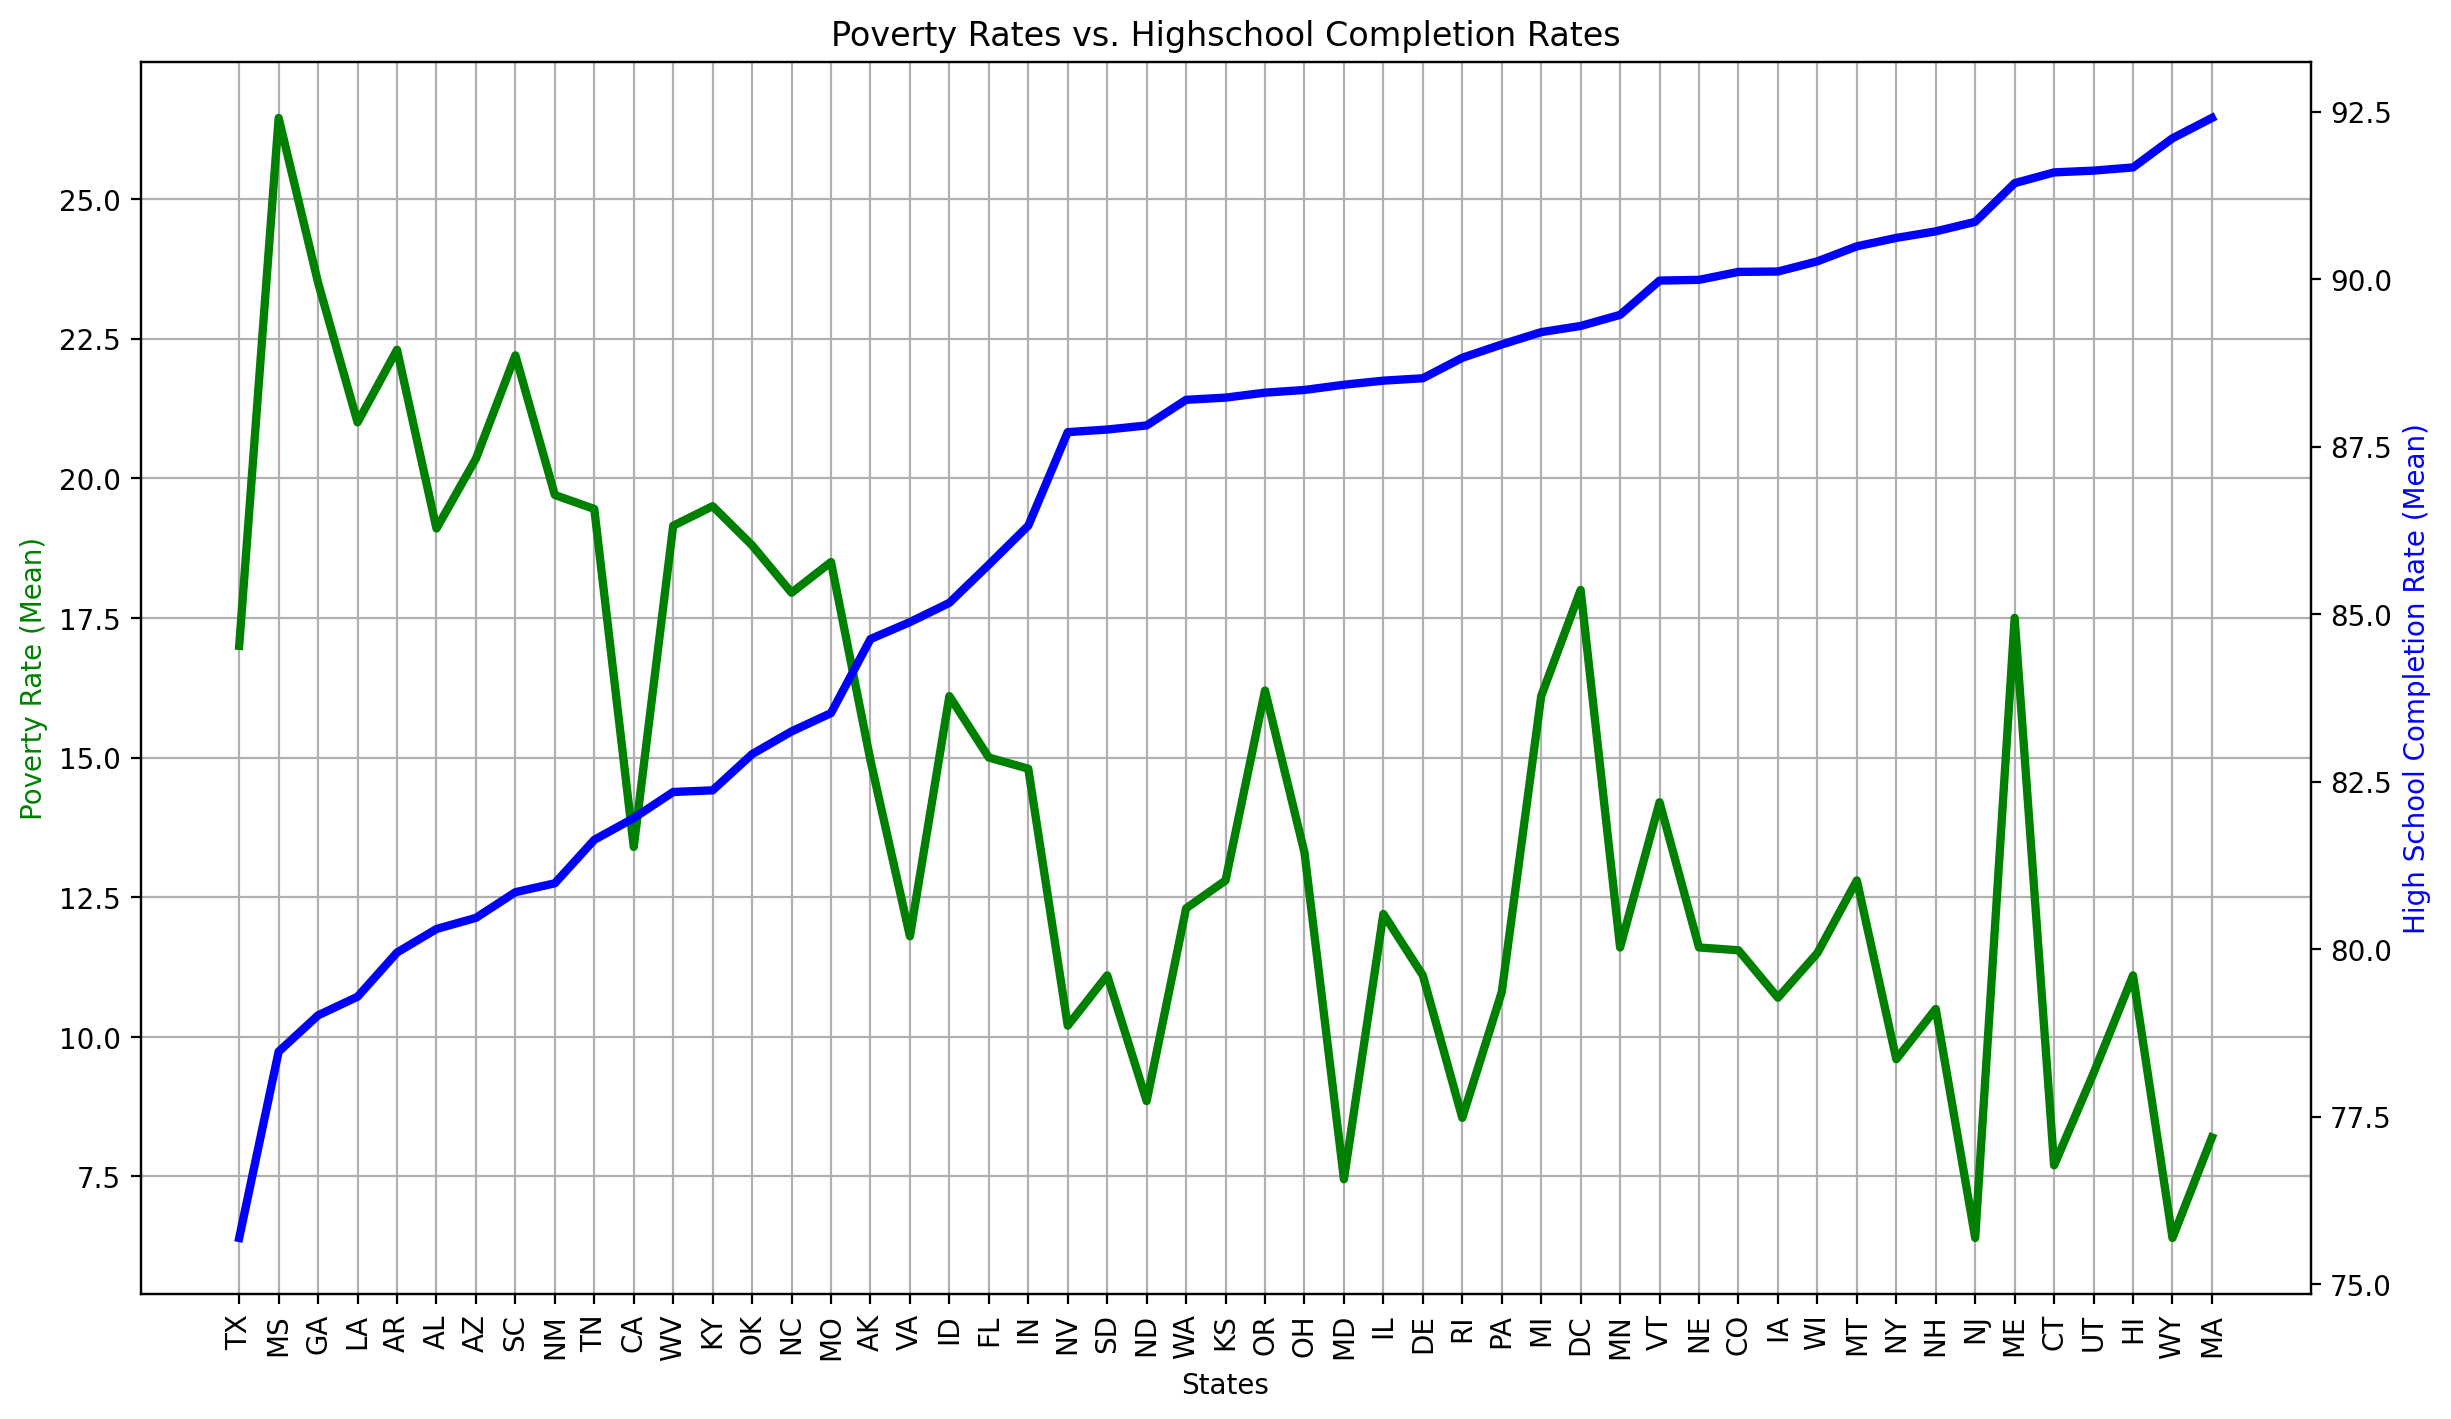

In [122]:
merged_poverty_highschool_rates = pd.merge(
    poverty_rate_by_state, high_school_completion_rate_by_state, on="Geographic Area"
).sort_values(by="percent_completed_hs")

plt.figure(figsize=(14, 8), dpi=200)
plt.title("Poverty Rates vs. Highschool Completion Rates")
plt.xticks(rotation=90)

axis1 = plt.gca()
axis2 = axis1.twinx()

axis1.plot(
    merged_poverty_highschool_rates["Geographic Area"],
    merged_poverty_highschool_rates.poverty_rate,
    color="green",
    linewidth=3,
)
axis1.grid(True)

axis2.plot(
    merged_poverty_highschool_rates["Geographic Area"],
    merged_poverty_highschool_rates.percent_completed_hs,
    color="blue",
    linewidth=3,
)

axis1.set_xlabel("States")
axis1.set_ylabel("Poverty Rate (Mean)", color="green")
axis2.set_ylabel("High School Completion Rate (Mean)", color="blue")


plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

<Figure size 2800x1600 with 0 Axes>

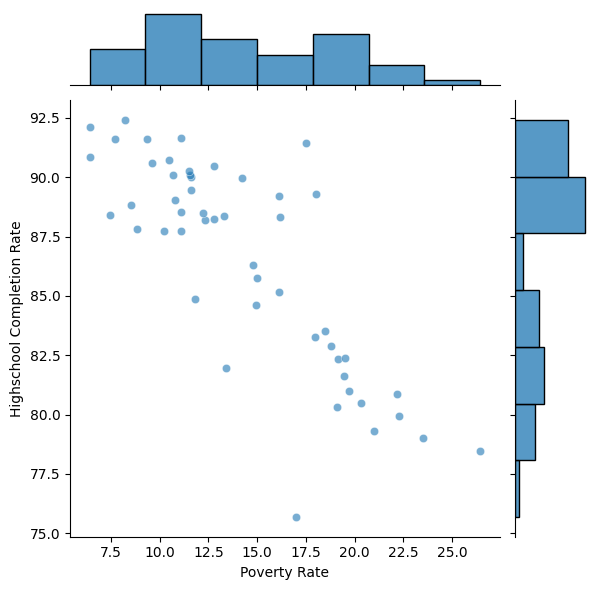

In [123]:
plt.figure(figsize=(14, 8), dpi=200)
sns.jointplot(
    data=merged_poverty_highschool_rates[["poverty_rate", "percent_completed_hs"]],
    x="poverty_rate",
    y="percent_completed_hs",
    joint_kws={"alpha": 0.6},
)
plt.xlabel("Poverty Rate")
plt.ylabel("Highschool Completion Rate")

plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

<Figure size 2800x1600 with 0 Axes>

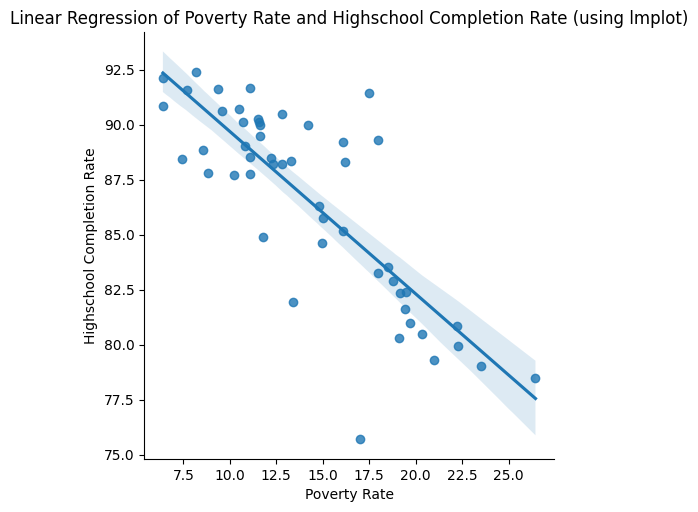

In [124]:
plt.figure(figsize=(14, 8), dpi=200)
sns.lmplot(
    data=merged_poverty_highschool_rates[["poverty_rate", "percent_completed_hs"]],
    x="poverty_rate",
    y="percent_completed_hs",
)

plt.title("Linear Regression of Poverty Rate and Highschool Completion Rate (using lmplot)")
plt.xlabel("Poverty Rate")
plt.ylabel("Highschool Completion Rate")
plt.show()

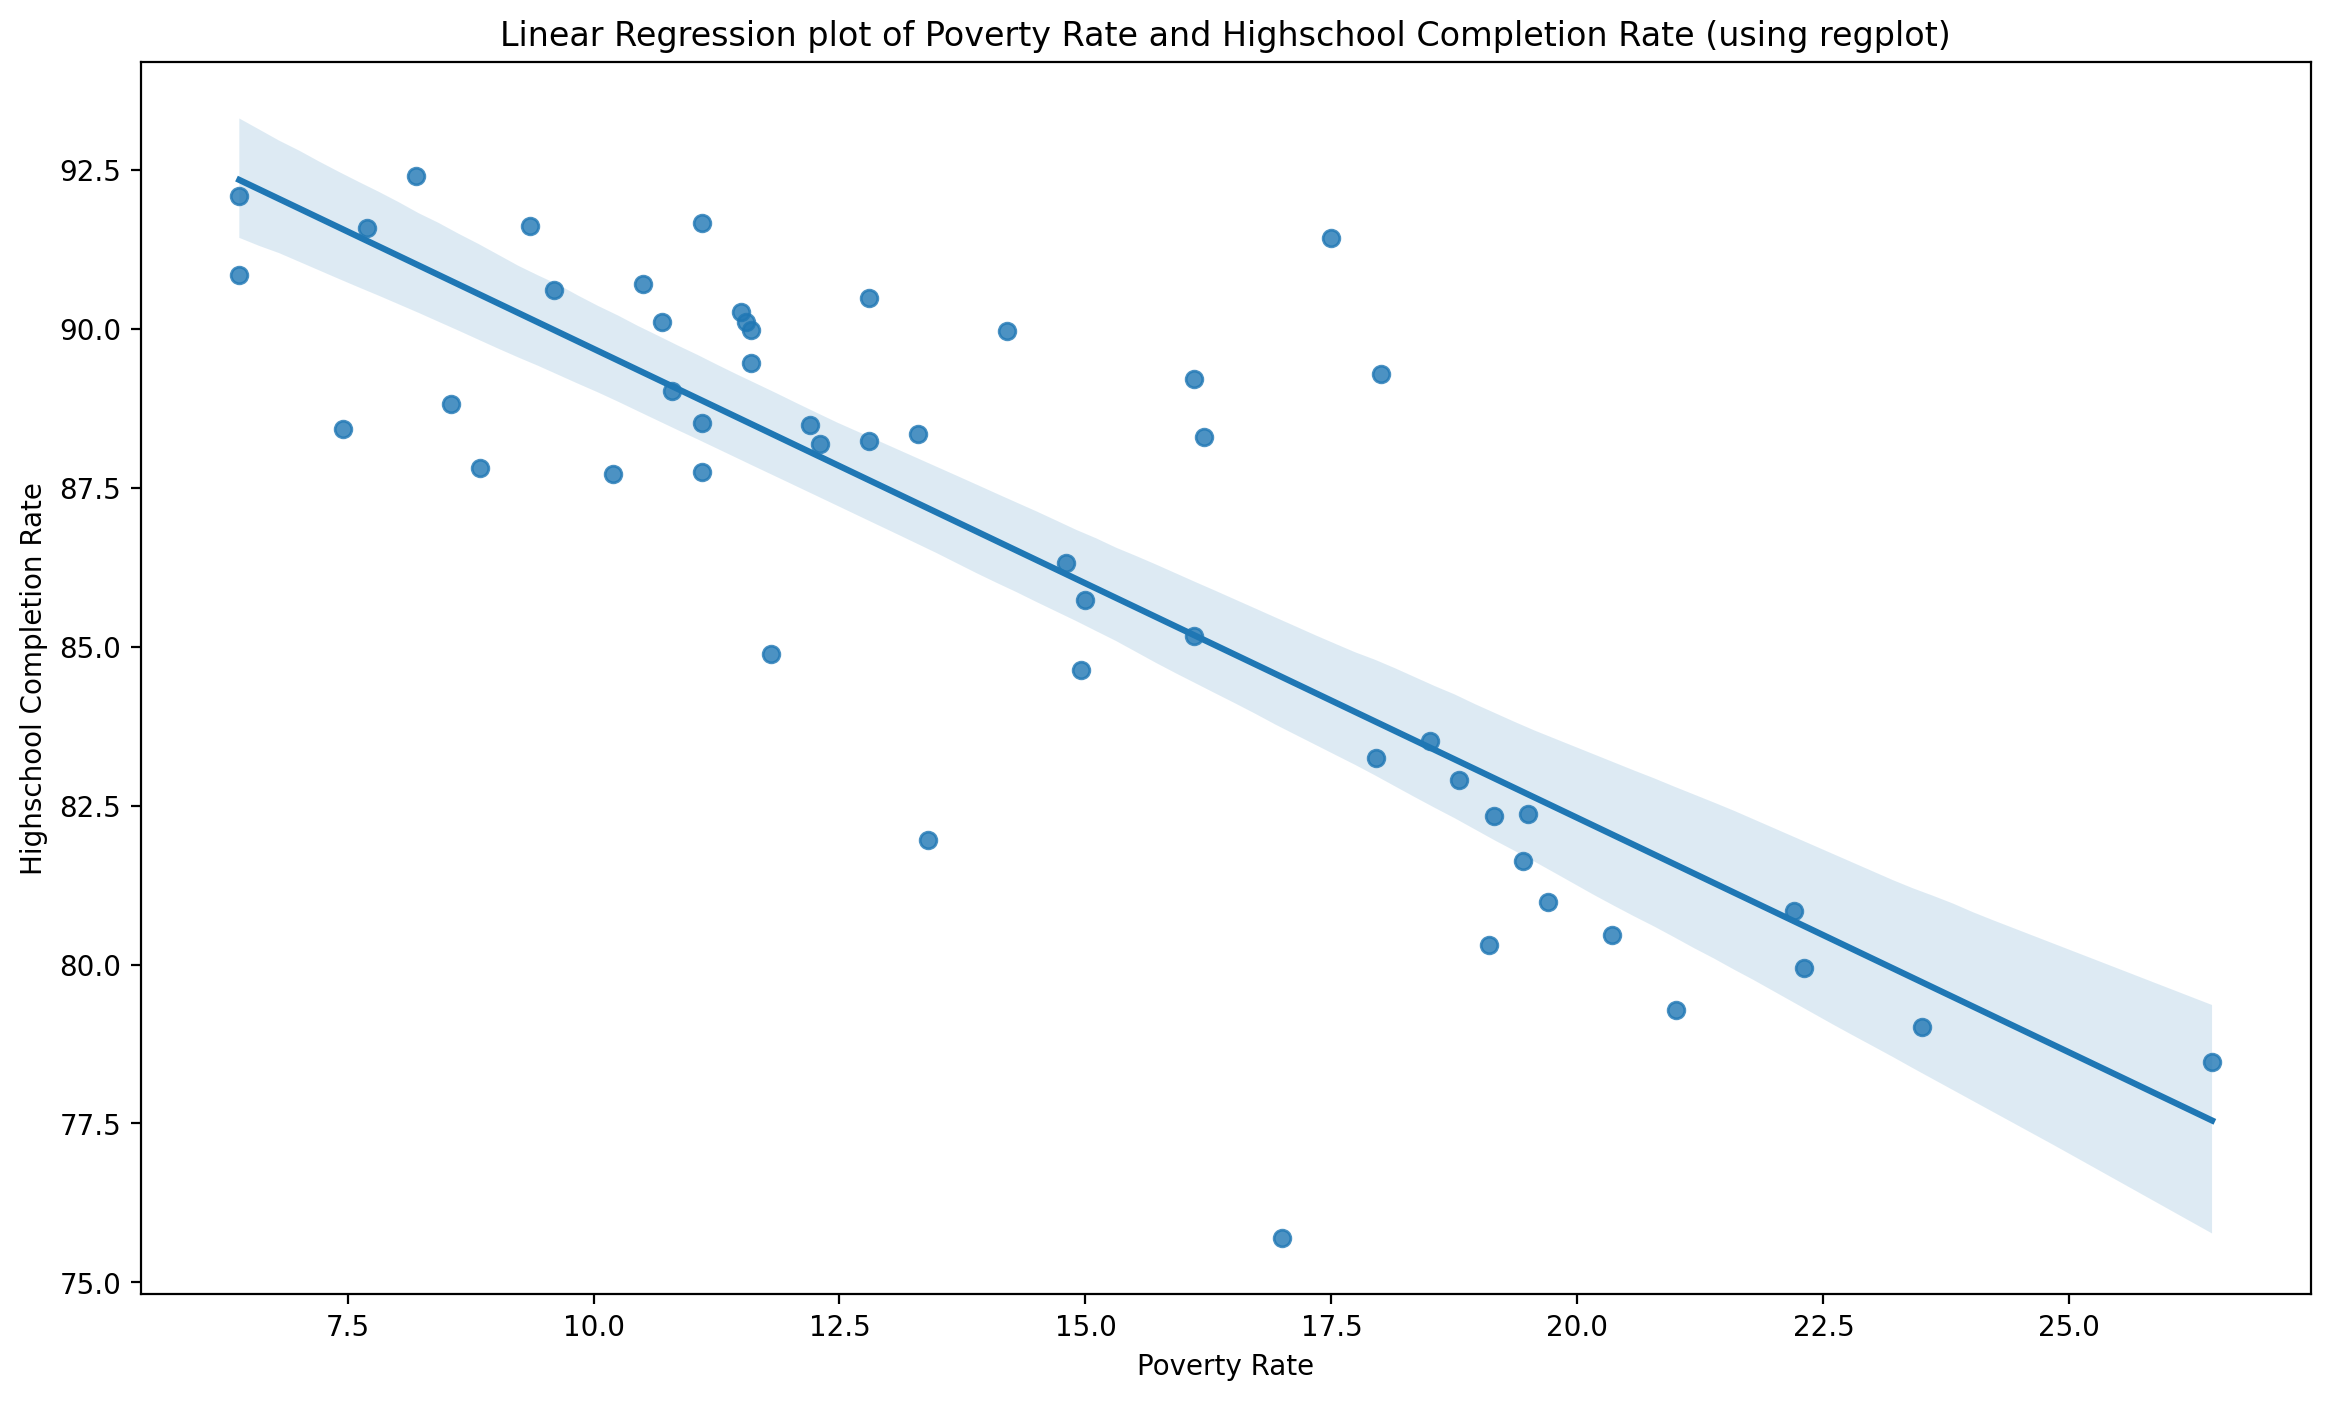

In [125]:
plt.figure(figsize=(14, 8), dpi=200)
sns.regplot(
    data=merged_poverty_highschool_rates[["poverty_rate", "percent_completed_hs"]],
    x="poverty_rate",
    y="percent_completed_hs",
)

plt.title("Linear Regression plot of Poverty Rate and Highschool Completion Rate (using regplot)")
plt.xlabel("Poverty Rate")
plt.ylabel("Highschool Completion Rate")
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [126]:
# Data types are all strings
df_share_race_city.dtypes

Geographic area          object
City                     object
share_white              object
share_black              object
share_native_american    object
share_asian              object
share_hispanic           object
dtype: object

In [127]:
# convert columns from string to numeric
df_share_race_city[
    [
        "share_white",
        "share_black",
        "share_native_american",
        "share_asian",
        "share_hispanic",
    ]
] = df_share_race_city[
    [
        "share_white",
        "share_black",
        "share_native_american",
        "share_asian",
        "share_hispanic",
    ]
].apply(
    pd.to_numeric, errors="coerce"
)

In [128]:
racial_makeup_by_us_state = df_share_race_city.groupby("Geographic area")[["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"]].mean().reset_index()
racial_makeup_by_us_state

,Geographic area,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AK,45.65,0.57,45.86,1.39,2.15
1,AL,72.51,23.32,0.66,0.48,2.98
2,AR,78.45,16.30,0.76,0.48,4.27
3,AZ,59.93,0.95,28.59,0.73,20.14
4,CA,71.87,2.69,1.72,5.57,29.65
5,CO,87.77,0.92,1.62,1.15,17.90
6,CT,86.11,4.99,0.66,2.99,7.98
7,DC,38.50,50.70,0.30,3.50,9.10
8,DE,76.25,15.39,0.52,2.00,7.42
9,FL,78.67,13.37,0.46,1.62,16.53


In [129]:
bar_us_racial_makeup = px.bar(
    data_frame=racial_makeup_by_us_state,
    x="Geographic area",
    y=["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"],
    barmode="stack"
)

bar_us_racial_makeup.update_layout(
    title="U.S. Racial Makeup by State",
    xaxis_title="U.S. States",
    yaxis_title="% Racial Makeu",
)

bar_us_racial_makeup.show()

# Create a Donut Chart of People Killed by Race

Hint: Use `.value_counts()`

In [130]:
fatalities_by_race = df_fatalities.race.value_counts()
fatalities_by_race

race
W    3300
B    1766
H    1166
A     129
N     105
O      19
Name: count, dtype: int64

In [131]:
pie_fatalities_by_race = px.pie(
    labels=fatalities_by_race.index,
    values=fatalities_by_race.values,
    names=fatalities_by_race.index,
    hole=0.5,
    title="Police Fatalities by Race",
)

pie_fatalities_by_race.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [132]:
fatalities_by_gender = df_fatalities.gender.value_counts()
fatalities_by_gender

gender
M    7613
F     358
Name: count, dtype: int64

In [133]:
pie_fatalities_by_gender = px.pie(
    labels=fatalities_by_gender.index,
    values=fatalities_by_gender.values,
    names=fatalities_by_gender.index,
    hole=0.5,
    title="Police Fatalities by Gender",
)

pie_fatalities_by_gender.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [134]:
manner_of_death_by_age = df_fatalities[["age", "manner_of_death"]]
manner_of_death_by_age

,age,manner_of_death
0,53.00,shot
1,47.00,shot
2,23.00,shot and Tasered
3,32.00,shot
4,39.00,shot
...,...,...
7997,NaN,shot
7998,NaN,shot
7999,38.00,shot
8000,NaN,shot


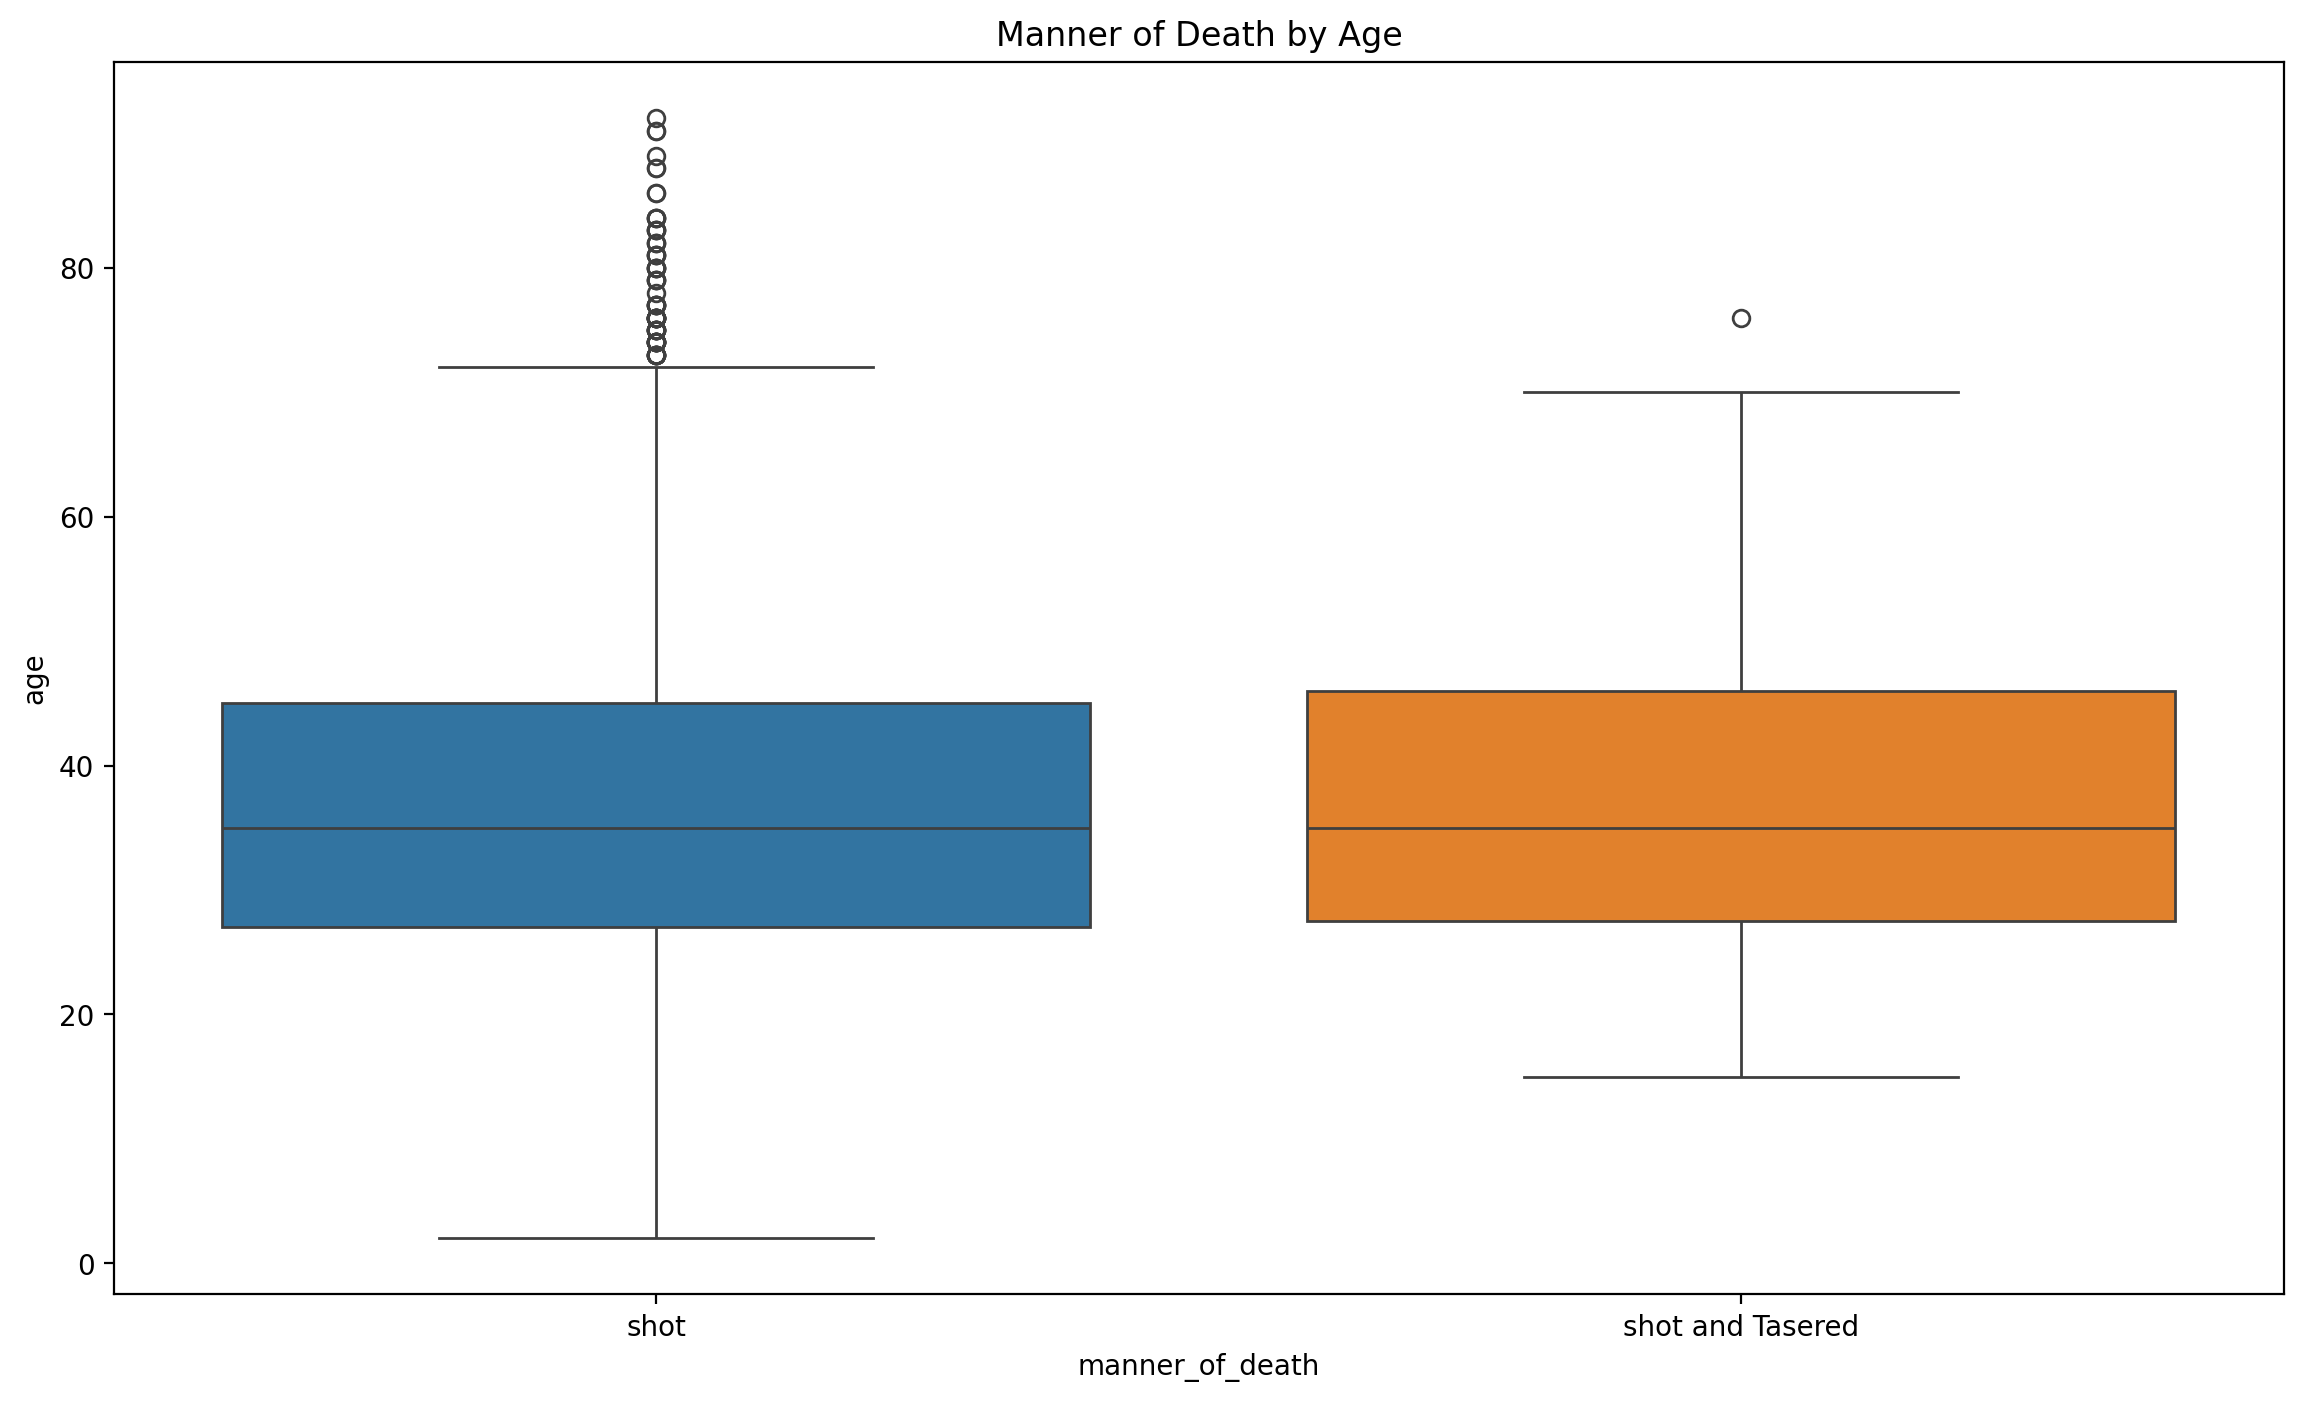

In [135]:
plt.figure(figsize=(14,8), dpi=200)
sns.boxplot(data=manner_of_death_by_age, x="manner_of_death", y="age", hue="manner_of_death")
plt.title("Manner of Death by Age")
plt.show()

In [136]:
manner_of_death_by_age_gender = df_fatalities[["age", "manner_of_death", "gender"]]
manner_of_death_by_age_gender

,age,manner_of_death,gender
0,53.00,shot,M
1,47.00,shot,M
2,23.00,shot and Tasered,M
3,32.00,shot,M
4,39.00,shot,M
...,...,...,...
7997,NaN,shot,M
7998,NaN,shot,M
7999,38.00,shot,M
8000,NaN,shot,M


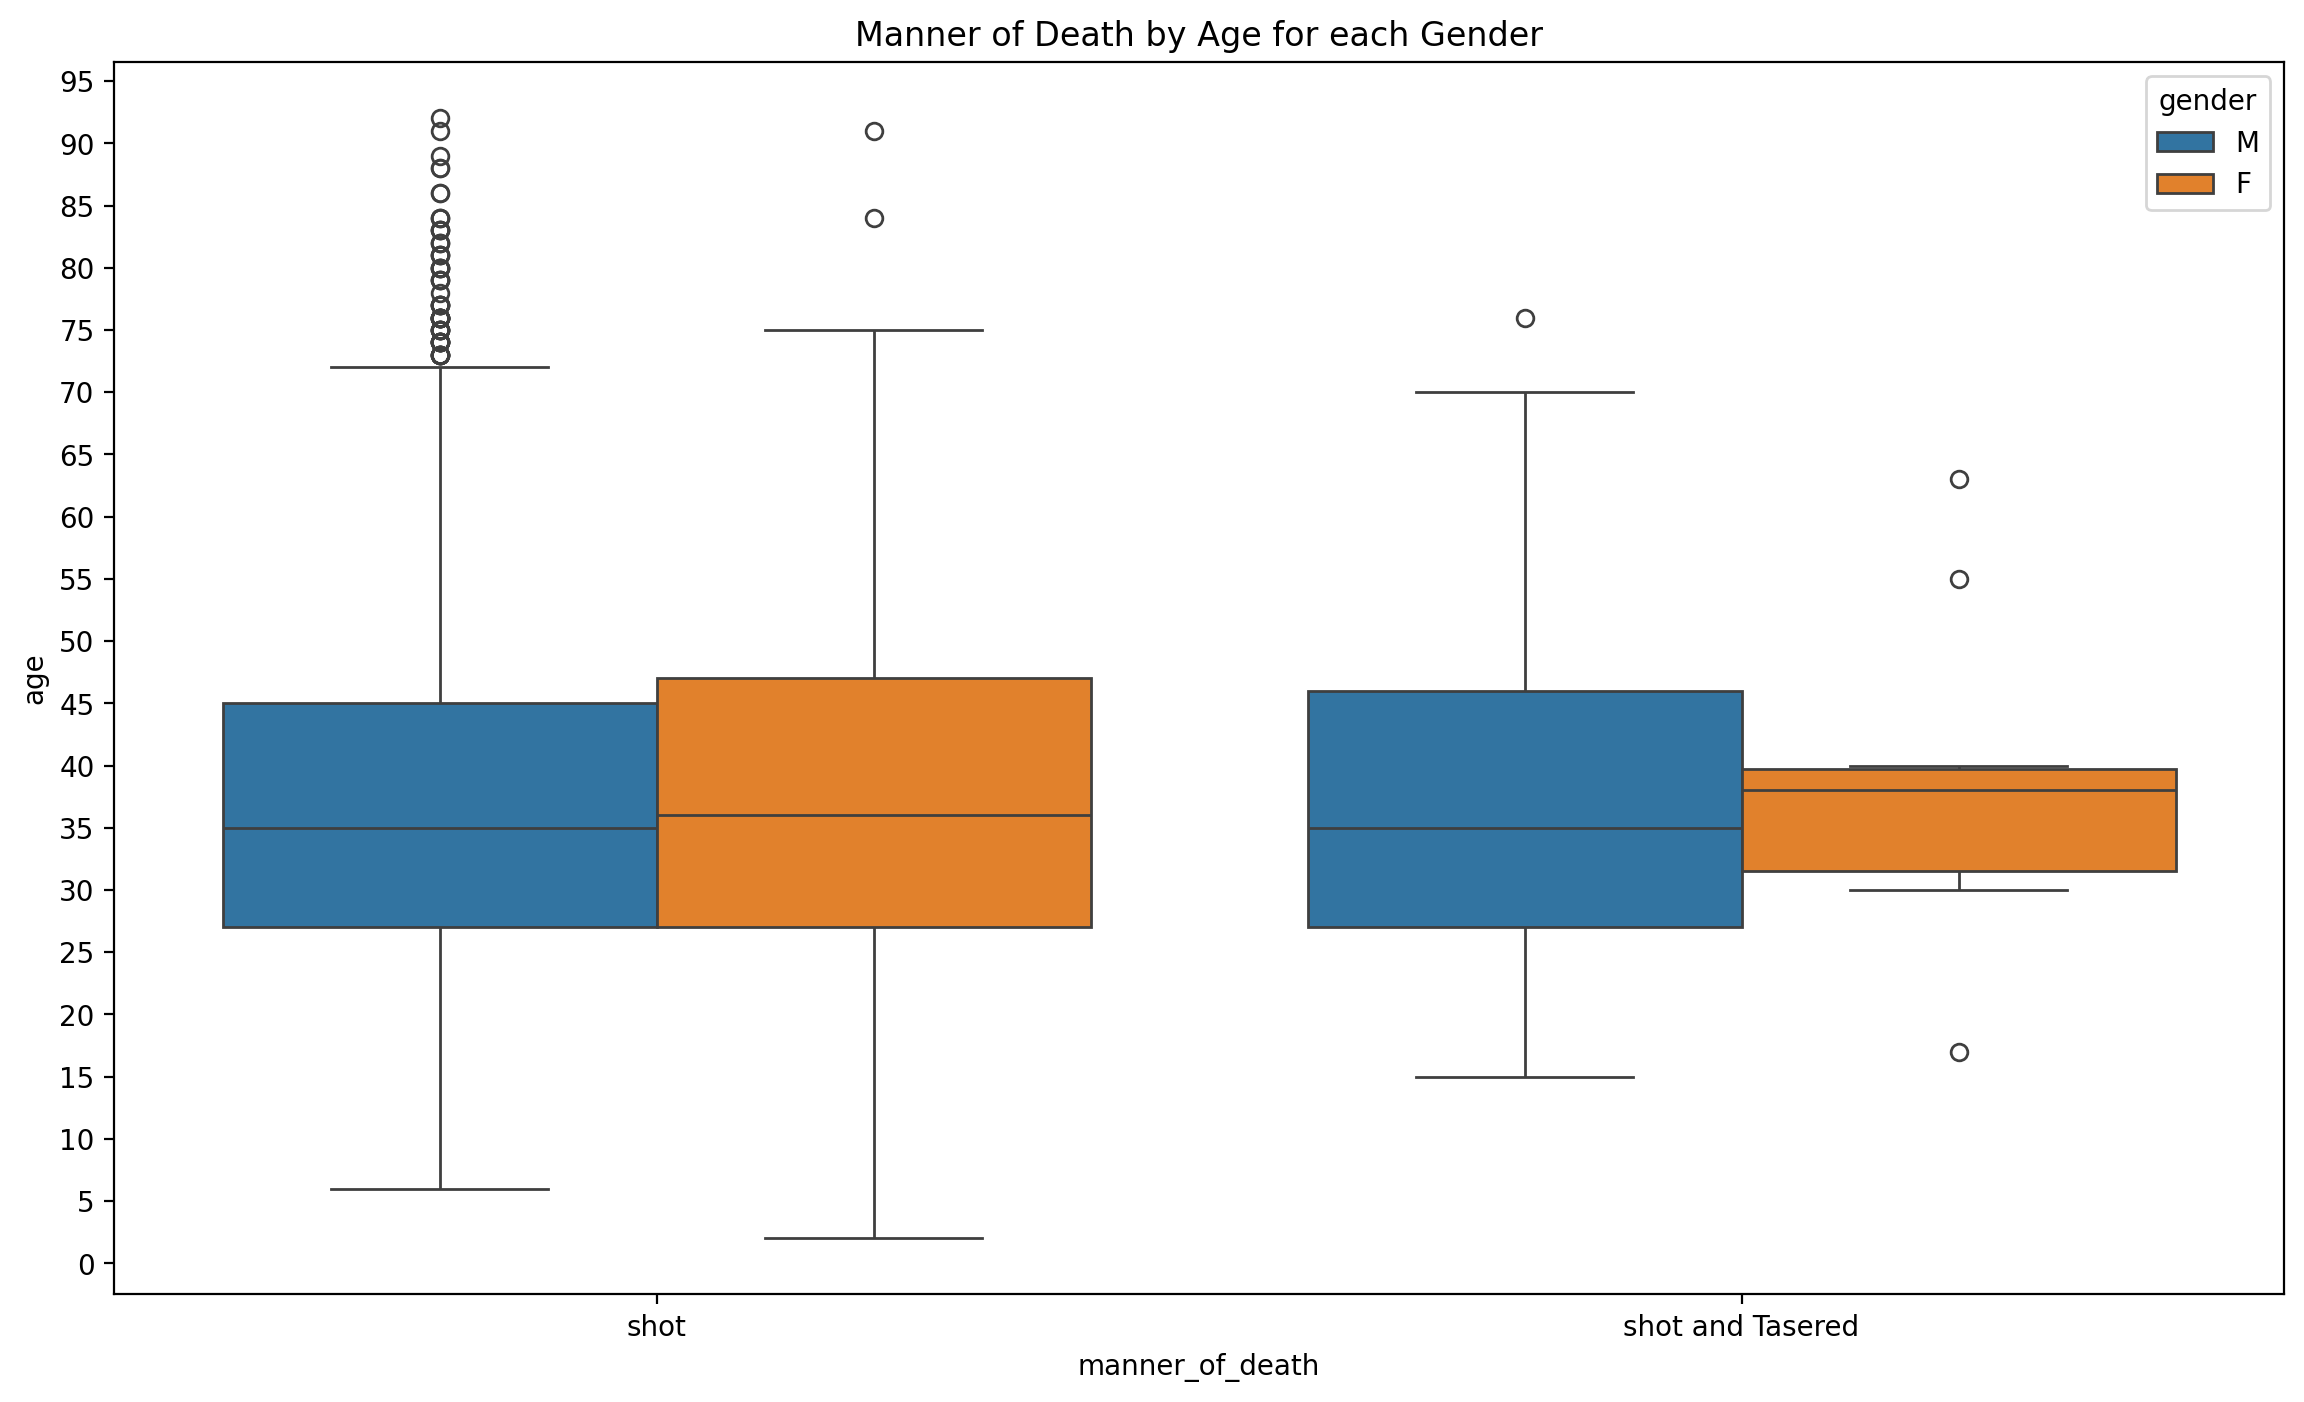

In [137]:
plt.figure(figsize=(14,8), dpi=200)
sns.boxplot(data=manner_of_death_by_age_gender, x="manner_of_death", y="age", hue="gender")
plt.title("Manner of Death by Age for each Gender")
plt.yticks(range(0,100,5))
plt.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [138]:
number_of_people_unarmed_armed = df_fatalities.armed.count()
number_of_armed_people = df_fatalities[df_fatalities.armed != "unarmed"].armed.count()
print(f"Number of 'armed' people killed by police: {number_of_armed_people}")
print(f"Percentage of police killings where people were armed: {number_of_armed_people/number_of_people_unarmed_armed * 100}")

Number of 'armed' people killed by police: 7331
Percentage of police killings where people were armed: 94.09575150815043


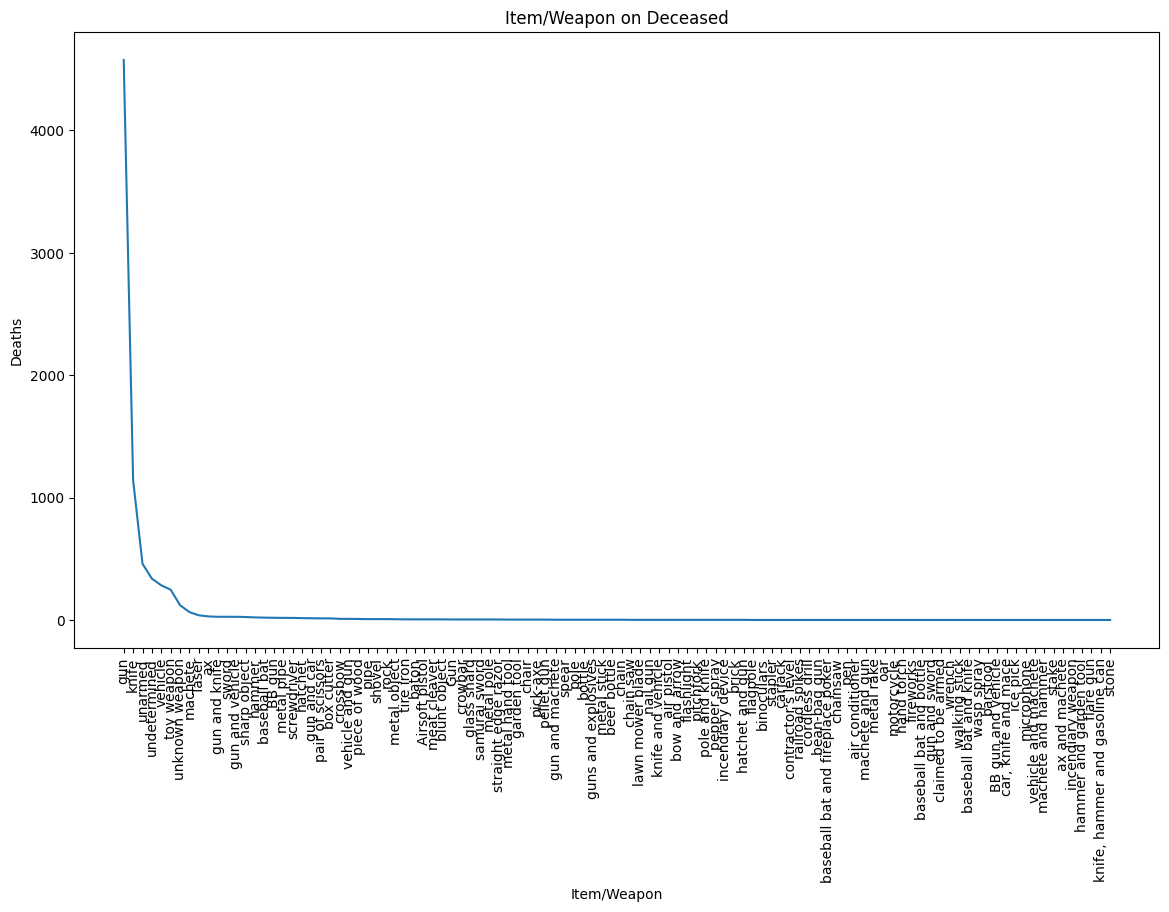

In [139]:

armed_item_counts = df_fatalities.armed.value_counts()

plt.figure(figsize=(14, 8))
plt.plot(armed_item_counts)
plt.xticks(rotation=90)
plt.title("Item/Weapon on Deceased")
plt.xlabel("Item/Weapon")
plt.ylabel("Deaths")
plt.show()

In [140]:
# number of people armed with guns vs. unarmed
df_fatalities[df_fatalities.armed.isin(["unarmed", "gun"])].armed.value_counts()

armed
gun        4573
unarmed     460
Name: count, dtype: int64

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [141]:
number_people_killed_under_25 = df_fatalities[df_fatalities.age < 25].age.count()
number_people_killed_under_25

np.int64(1184)

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

<Figure size 2800x1600 with 0 Axes>

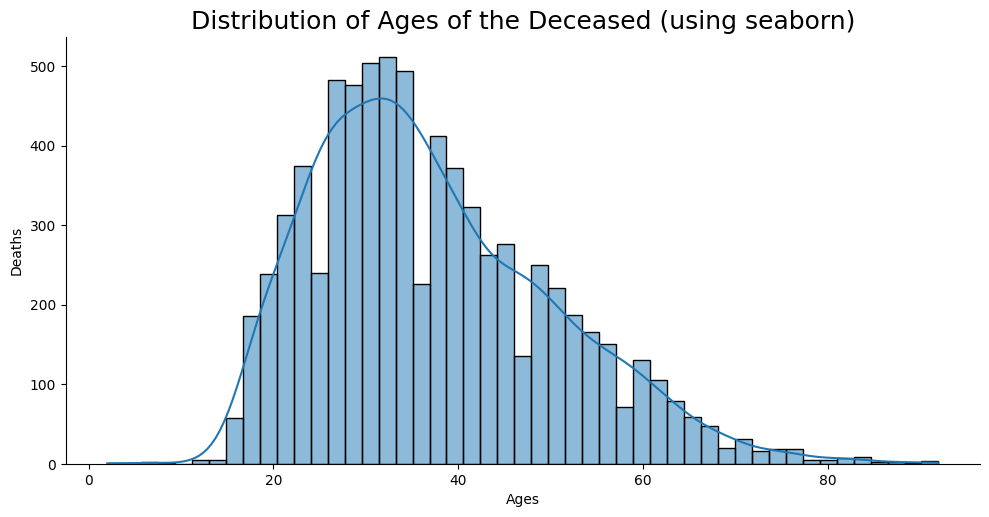

In [142]:
plt.figure(figsize=(14,8), dpi=200)
sns.displot(data=df_fatalities.age, kde=True, aspect=2)
plt.title("Distribution of Ages of the Deceased (using seaborn)", fontsize=18)
plt.xlabel("Ages")
plt.ylabel("Deaths")
plt.show()

In [143]:
histogram = px.histogram(
    data_frame=df_fatalities,
    x="age", 
    title="Distribution of Ages of the Deceased (using plotly)",
    nbins=20,
)

histogram.update_layout(
    xaxis_title="Ages",
    yaxis_title="Deaths",
)

histogram.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

<Figure size 2800x1600 with 0 Axes>

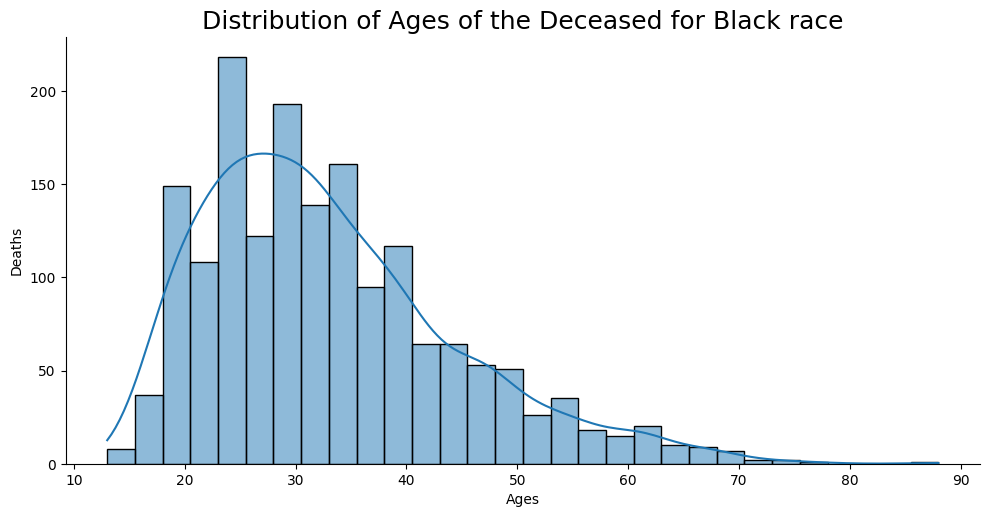

<Figure size 2800x1600 with 0 Axes>

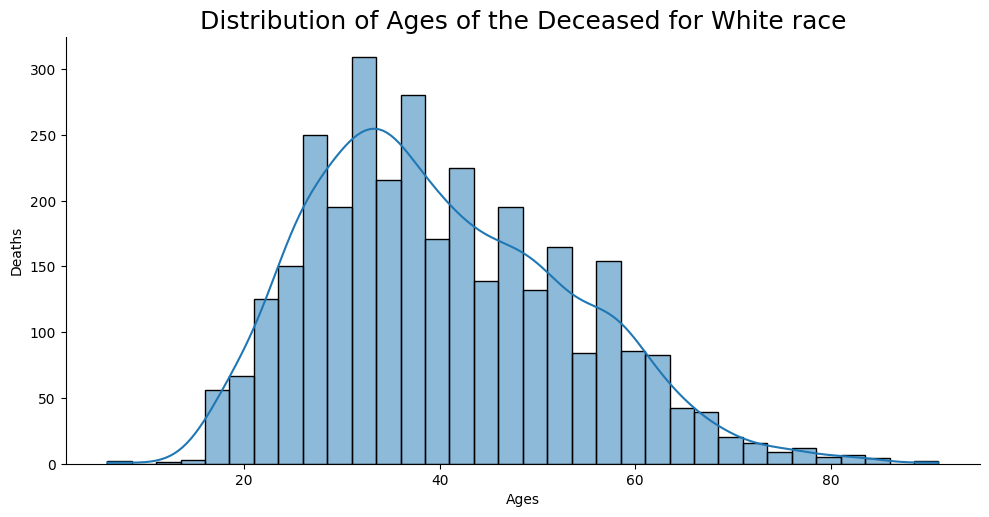

<Figure size 2800x1600 with 0 Axes>

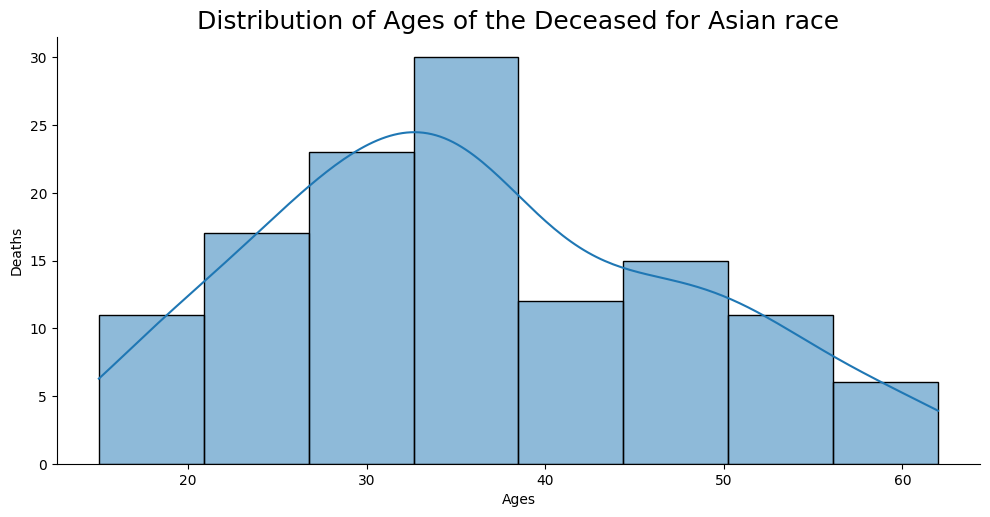

<Figure size 2800x1600 with 0 Axes>

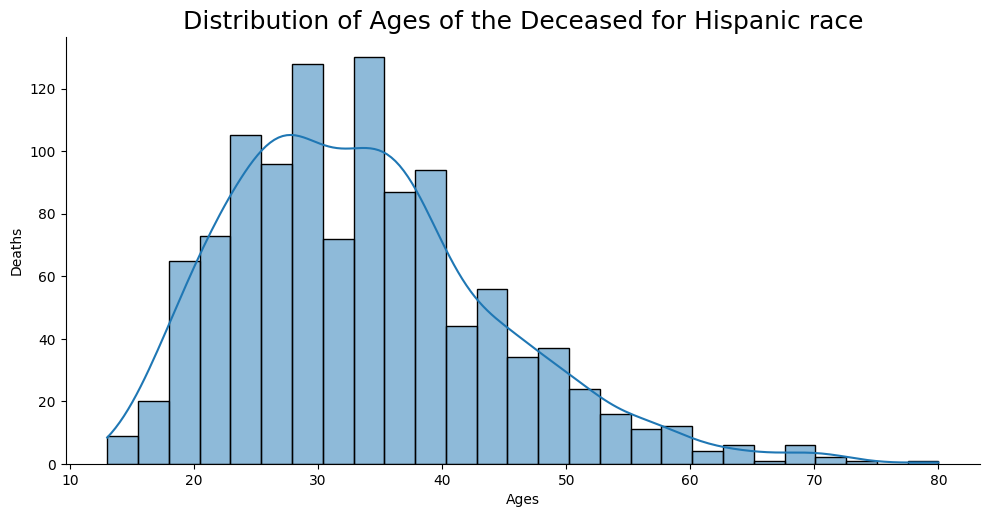

<Figure size 2800x1600 with 0 Axes>

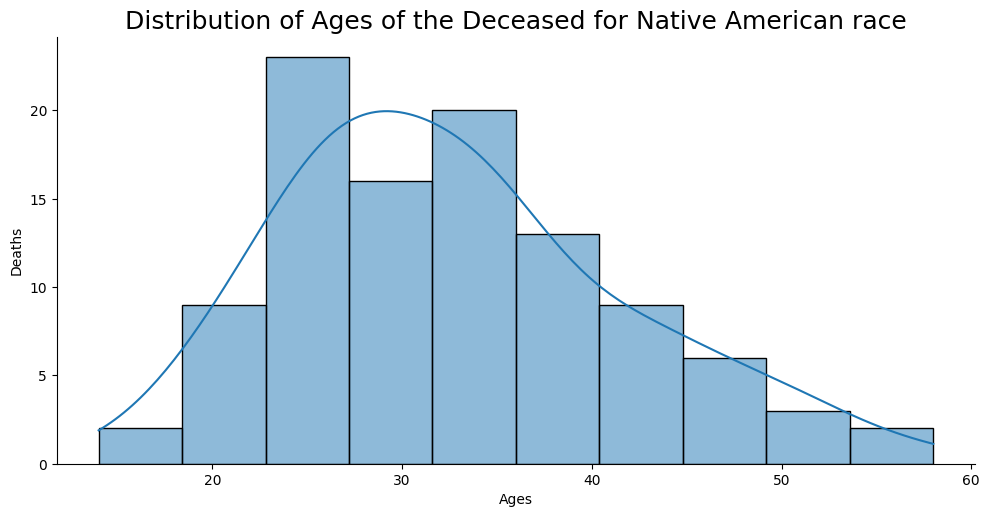

<Figure size 2800x1600 with 0 Axes>

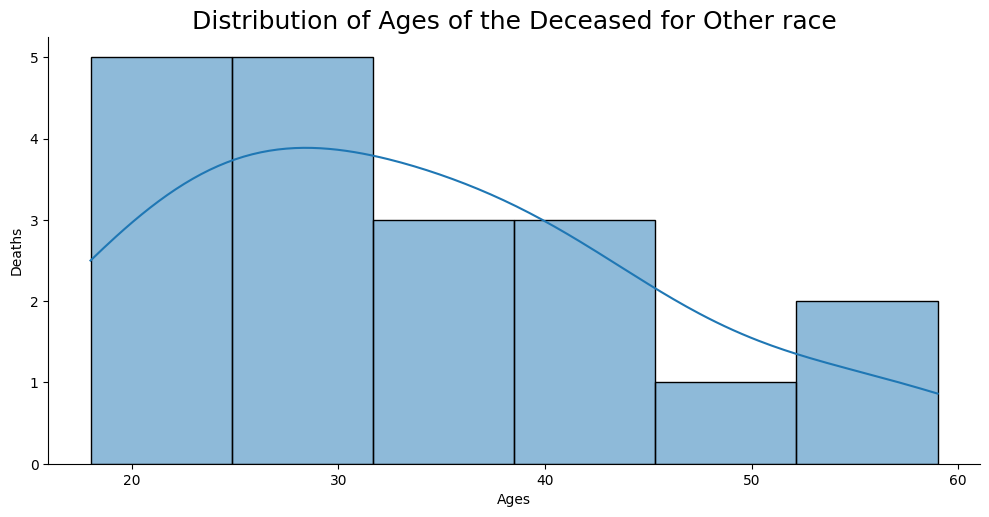

In [144]:
races = ["Black", "White", "Asian", "Hispanic", "Native American", "Other"]

for race in races:
    plt.figure(figsize=(14,8), dpi=200)
    sns.displot(data=df_fatalities[df_fatalities.race == race[0]].age, kde=True, aspect=2)
    plt.title(f"Distribution of Ages of the Deceased for {race} race", fontsize=18)
    plt.xlabel("Ages")
    plt.ylabel("Deaths")

plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [145]:
number_fatalities_by_race = df_fatalities.race.value_counts()
number_fatalities_by_race

race
W    3300
B    1766
H    1166
A     129
N     105
O      19
Name: count, dtype: int64

In [146]:
pie_number_fatalities_by_race = px.pie(
    labels=number_fatalities_by_race.index,
    values=number_fatalities_by_race.values,
    names=number_fatalities_by_race.index,
    hole=0.5,
    title="Police Fatalities by Race",
)

pie_number_fatalities_by_race.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [147]:
number_mental_illness = df_fatalities.signs_of_mental_illness.value_counts()
number_mental_illness

signs_of_mental_illness
False    6331
True     1671
Name: count, dtype: int64

In [148]:
pie_number_mental_illness = px.pie(
    labels=number_mental_illness.index,
    values=number_mental_illness.values,
    names=number_mental_illness.index,
    hole=0.5,
    title="Police Fatalities by Mental Illness",
)

pie_number_mental_illness.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [149]:
top_10_cities_most_police_killings = df_fatalities.groupby("city").city.value_counts().sort_values(ascending=False).head(10).reset_index()
top_10_cities_most_police_killings

,city,count
0,Los Angeles,130
1,Phoenix,105
2,Houston,91
3,San Antonio,68
4,Las Vegas,68
5,Albuquerque,59
6,Chicago,50
7,Columbus,48
8,Denver,47
9,Jacksonville,46


In [150]:
bar = px.bar(
    data_frame=top_10_cities_most_police_killings,
    x="count",
    y="city",
    color="city"
)

bar.update_layout(
    title="Top 10 U.S. Cities with the Most Police Killings",
    xaxis_title="Deaths",
    yaxis_title="U.S. Cities",
)

bar.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [151]:
police_killing_by_race_top_10_citites = df_fatalities[df_fatalities.city.isin(top_10_cities_most_police_killings.city)].groupby("city").race.value_counts(normalize=True).reset_index()
police_killing_by_race_top_10_citites

,city,race,proportion
0,Albuquerque,H,0.74
1,Albuquerque,W,0.24
2,Albuquerque,B,0.02
3,Chicago,B,0.79
4,Chicago,H,0.17
5,Chicago,W,0.04
6,Columbus,B,0.67
7,Columbus,W,0.33
8,Denver,H,0.39
9,Denver,W,0.28


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [152]:
us_states_most_police_killings = df_fatalities.groupby("state").state.value_counts().sort_values(ascending=False)
us_states_most_police_killings

state
CA    1143
TX     732
FL     509
AZ     363
GA     306
CO     294
OH     227
NC     226
OK     224
WA     221
TN     215
MO     206
NM     173
PA     167
IL     162
LA     160
IN     148
AL     147
NY     146
KY     145
VA     139
MI     135
NV     131
OR     130
SC     129
WI     121
AR     112
MD     111
MS     103
UT      90
NJ      90
MN      86
WV      75
KS      75
ID      64
MA      54
AK      53
MT      51
IA      49
NE      40
HI      37
ME      34
WY      28
SD      28
DC      24
CT      23
NH      22
ND      18
DE      17
VT      13
RI       6
Name: count, dtype: int64

In [153]:
plt.figure(figsize=(14, 8), dpi=200)

choropleth_us_states_most_police_killings = px.choropleth(
    locationmode="USA-states",
    locations=us_states_most_police_killings.index,
    hover_name=us_states_most_police_killings.index,
    color=us_states_most_police_killings.values,
    color_continuous_scale="matter",
)

choropleth_us_states_most_police_killings.update_layout(
    coloraxis_colorbar={"title": "Police Killings"},
    geo=dict(scope="usa")

)

choropleth_us_states_most_police_killings.show()

<Figure size 2800x1600 with 0 Axes>

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [154]:
# create new dataset with date strings converted to date-time objects
df_fatalities_date_time = df_fatalities.copy()
df_fatalities_date_time.date = pd.to_datetime(df_fatalities_date_time.date, format="mixed")
df_fatalities_date_time

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.12,47.25,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.89,45.49,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False,-97.28,37.70,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.42,37.76,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False,-104.69,40.38,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7997,8690,NaN,2022-11-30,shot,vehicle,NaN,M,NaN,Mesa,AZ,False,attack,NaN,False,-111.81,33.40,True
7998,8692,NaN,2022-11-30,shot,knife,NaN,M,NaN,Mariposa County,CA,False,other,NaN,False,-119.99,37.50,True
7999,8694,NaN,2022-12-01,shot,gun,38.00,M,NaN,Tulare,CA,False,attack,NaN,False,-119.33,36.24,True
8000,8695,NaN,2022-12-01,shot,gun,NaN,M,NaN,Topeka,KS,False,other,NaN,False,-95.69,39.03,True


In [155]:
police_killings_over_time = df_fatalities_date_time.groupby(df_fatalities_date_time.date.dt.year).size()
police_killings_over_time

date
2015     994
2016     958
2017     981
2018     992
2019     999
2020    1019
2021    1053
2022    1006
dtype: int64

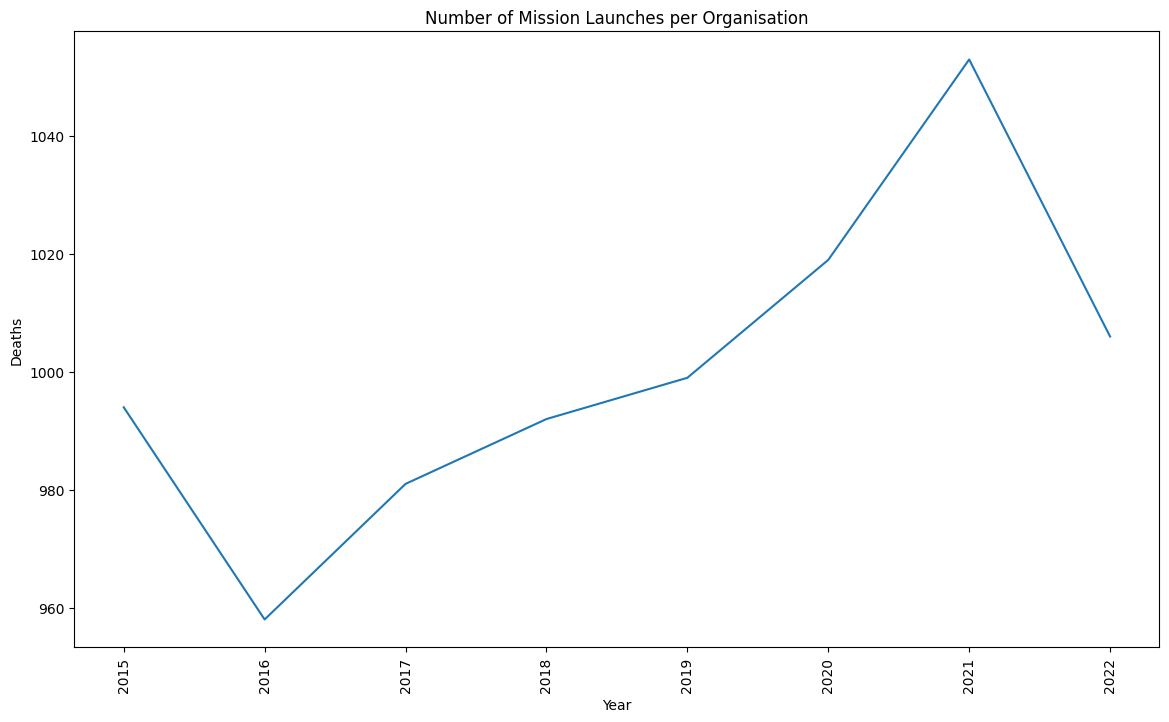

In [156]:
plt.figure(figsize=(14, 8))
plt.plot(police_killings_over_time.index, police_killings_over_time.values)
plt.xticks(rotation=90)
plt.title("Number of Mission Launches per Organisation")
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).